In [ ]:
# importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime

In [ ]:
enlace = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSaDGKb9OUwYDiiXDTcM3r11YTwllX74DWLNrROxtejbjuFqT-C4EUlEg7U5-2xkw/pub?gid=697222197&single=true&output=csv'

In [ ]:
df = pd.read_csv(enlace)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
# df.tail
df.columns

In [ ]:
# verificar que tipo de datos tenemos en fecha
df.dtypes

Transformando la fecha a tipo fecha

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=False)

In [ ]:
# setear la fecha como indice

df.set_index('Fecha',inplace=True)
df.head()

In [ ]:
df.tail()

In [ ]:
# hacemos un plot
df.plot()
plt.show()

In [ ]:
df.shape

# descomponiendo la serie

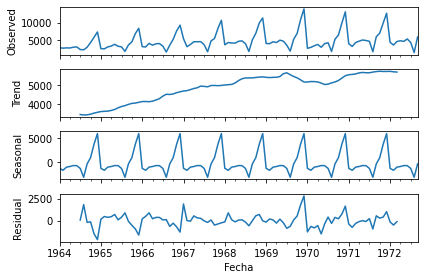

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['venta'], model='additive')  
result.plot();

In [16]:
# verificamos la estacionariedad

from statsmodels.tsa.stattools import adfuller

In [17]:
# Ho: is non-stationary
# H1: is stationary
# si p_vlue < 0.05 se rechaza H0

test_result = adfuller(df['venta'])
print(test_result)

(-1.8335930563276188, 0.363915771660247, 11, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, 1478.4633060594724)


In [ ]:
# No se rechaza H0 por lo tanto la serie no es estacionaria

Primero probamos con diferencias

In [18]:
# aplicaremos diferencia y diferencia estacional

df['Sales First Difference'] = df['venta'] - df['venta'].shift(1)
df['Seasonal First Difference'] = df['venta'] - df['venta'].shift(12)
df.head(20)

,venta,Sales First Difference,Seasonal First Difference
Fecha,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


Aplicando el test a la primera diferencia regular

In [19]:
# Again testing if data is stationary
adfuller(df['Sales First Difference'].dropna())

(-7.189896448051,
 2.519620447387081e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '10%': -2.583823615311909,
  '5%': -2.893507960466837},
 1466.8267262915892)

Observamos que despues de hacer la primera diferencia vs perodo pasado la serie resultante es estacionaria segun el test

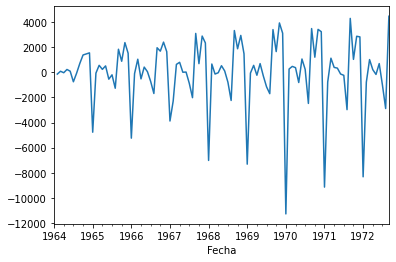

In [20]:
df['Sales First Difference'].plot()

# al plotear vemos que no esestacionaria en varianza

In [21]:
# Again testing if data is stationary
adfuller(df['Seasonal First Difference'].dropna())

(-7.626619157213166,
 2.0605796968136632e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '10%': -2.583823615311909,
  '5%': -2.893507960466837},
 1294.7753384560438)

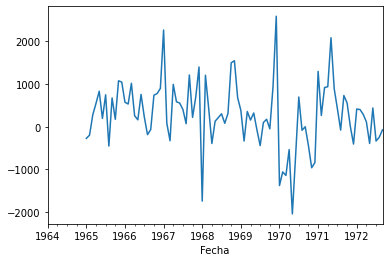

In [22]:
df['Seasonal First Difference'].plot()

Autocorrelacion

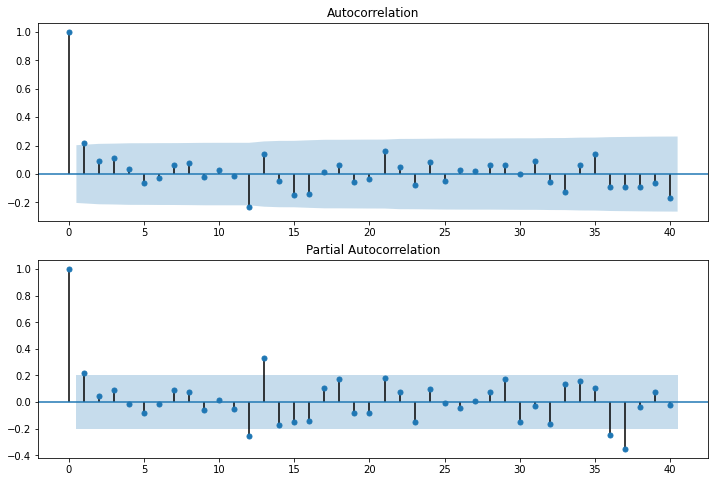

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [24]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['venta'],order = (1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.venta   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 21 May 2022   AIC                           1910.251
Time:                        17:52:23   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.venta     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.venta    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

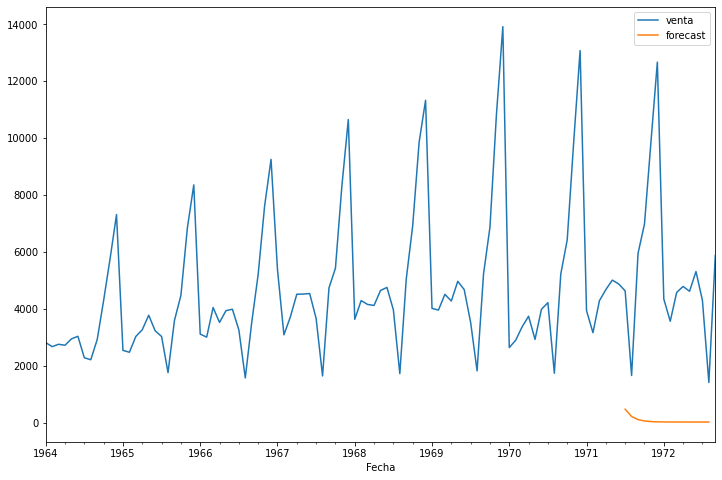

In [25]:
df['forecast'] = model_fit.predict(start=90,end=103,dynamic=True)
df[['venta','forecast']].plot(figsize=(12,8))

Crear el modelo clásico estadístico

In [26]:
## creando el modelo de serie temporal

model = sm.tsa.statespace.SARIMAX(df['venta'],order = (1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [27]:
print(results.aic, results.bic)

1486.8041358157977 1499.4130787010429


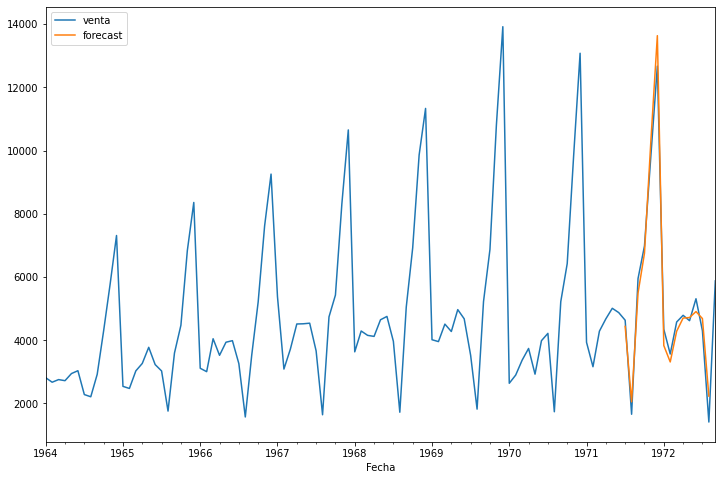

In [28]:
# comparo real vs predicción

df['forecast'] = results.predict(start = 90,end=103, dynamic = True)
df[['venta','forecast']].plot(figsize=(12,8))

In [29]:
# para verificar la última fecha de mi data

df.tail(1)

,venta,Sales First Difference,Seasonal First Difference,forecast
Fecha,,,,
1972-09-01,5877,4464.0,-74.0,NaN


In [30]:
# genero 24 fechas futuras para predecir
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range (0,24)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [31]:
# genero los espacios para almacenar la predicción 
future_datest_df = pd.DataFrame(index = future_dates[1:],columns=df.columns)

In [32]:
future_datest_df

,venta,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


Unimos verticalmente las tablas originales con la que guarda el pronostico

In [33]:
# concateno ambas tablas para graficar
future_df = pd.concat([df,future_datest_df])

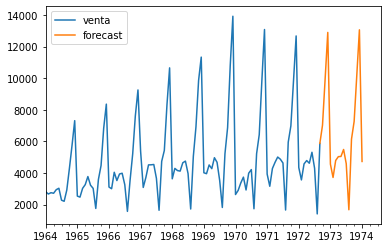

In [34]:
# pronostico

future_df['forecast'] = results.predict(start=104,end=120,dynamic = True)
future_df[['venta','forecast']].plot()

In [36]:
future_df.tail(10)

,venta,Sales First Difference,Seasonal First Difference,forecast
1973-11-01,NaN,NaN,NaN,10194.735769
1973-12-01,NaN,NaN,NaN,13057.412488
1974-01-01,NaN,NaN,NaN,4731.200830
1974-02-01,NaN,NaN,NaN,NaN
1974-03-01,NaN,NaN,NaN,NaN
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [37]:
import statsmodels.graphics.tsaplots as sgt

Verificamos los residuos

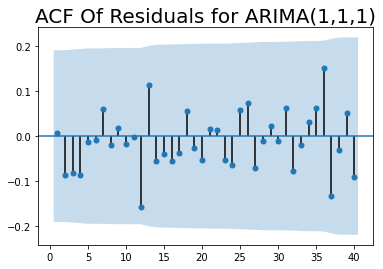

In [38]:
df['res_ar_1_i_1_ma_1'] = results.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

In [39]:
df.head()

,venta,Sales First Difference,Seasonal First Difference,forecast,res_ar_1_i_1_ma_1
Fecha,,,,,
1964-01-01,2815,NaN,NaN,NaN,2815.000000
1964-02-01,2672,-143.0,NaN,NaN,144.284443
1964-03-01,2755,83.0,NaN,NaN,187.124168
1964-04-01,2721,-34.0,NaN,NaN,27.190037
1964-05-01,2946,225.0,NaN,NaN,246.764383


[]

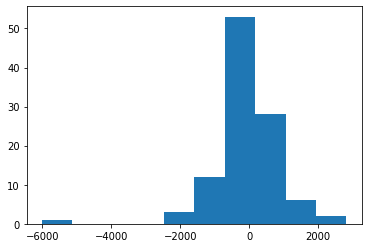

In [40]:
plt.hist(df.res_ar_1_i_1_ma_1)
plt.plot()